###  <b> XÁC SUẤT THÔNG KÊ:
#### <b> 1. XỬ LÝ SỐ LIỆU:

In [1]:
# Thư viện
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
from scipy.stats import norm
from datetime import datetime
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols
from geopy.distance import geodesic

##### <b> •	Tổng quan về dirty_data.csv và warehouses.csv

In [2]:
# Dẫn đường dẫn tệp CSV
dirty_data_path = r"..\datasets\dirty_data.csv"

# Đọc dữ liệu từ tệp CSV
thongke = pd.read_csv(dirty_data_path)

# Hiển thị 5 số liệu đầu tiên
thongke.iloc[0:5]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [3]:
# Dẫn đường dẫn tệp CSV
warehouses_path= r"..\datasets\warehouses.csv"

# Đọc dữ liệu từ tệp CSV
diachi = pd.read_csv(warehouses_path)

# Hiển thị các số liệu
diachi.head()

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


In [4]:
# Tổng quan về file CSV dirty_data
print(f'Tổng quan về file CSV dirty_data: {thongke.shape}')

Tổng quan về file CSV dirty_data: (500, 16)


##### <b> • Xử lý dữ liệu ở cột "date"

In [5]:
# Chuyển đổi cột "date" thành kiểu datetime
thongke['date'] = pd.to_datetime(thongke['date'], errors='coerce')

# Sắp xếp lại thứ tự cho cột "date"
thongke = thongke.sort_values(by='date')

# Hiển thị kết quả
thongke.iloc[0:10]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
64,ORD103199,ID0711334400,2019-01-02,Thompson,"[('iStream', 2), ('Thunder line', 2), ('Lucent...",5890,78.13,-37.806863,144.958942,10,5379.13,winter,False,1.2283,great value bought this as an inexpensive repl...,True
205,ORD474833,ID0767752599,2019-01-04,Nickolson,"[('Thunder line', 2), ('Universe Note', 1), ('...",12690,64.79,-37.804032,144.969535,25,9582.29,Summer,False,1.6211,camera makes noise and the heart rate sensor s...,False
54,ORD308765,ID0107172471,2019-01-04,Nickolson,"[('iStream', 1), ('Thunder line', 1)]",2330,89.45,-37.821421,144.963925,5,2302.95,Summer,True,0.5863,five stars it is everything and more. seller t...,True
19,ORD232940,ID2020835025,2019-01-04,Nickolson,"[('iAssist Line', 1), ('Toshika 750', 1)]",6545,77.11,-37.814917,144.968020,5,6294.86,Summer,True,61.2935,tablet had trouble from the begging it kept re...,False
26,ORD330543,ID0282854607,2019-01-05,Bakers,"[('pearTV', 2), ('Lucent 330S', 1), ('Toshika ...",22490,105.04,-37.802871,145.016633,10,20346.04,Summer,True,2.0425,more options where's the different option for ...,True
117,ORD226730,ID0331417136,2019-01-06,Bakers,"[('Lucent 330S', 1), ('Candle Inferno', 2)]",2090,83.97,-37.822806,145.009337,5,2069.47,Summer,False,1.8899,this phone crushed the mate se amazing phone! ...,True
187,ORD152093,ID4735836869,2019-01-07,Thompson,"[('pearTV', 1), ('Olivia x460', 1), ('Universe...",16615,75.93,-37.803264,144.950060,5,15860.18,Summer,False,1.0799,great windows phone absolutely love this phone...,True
87,ORD168543,ID1982456970,2019-01-07,Bakers,"[('pearTV', 2), ('iAssist Line', 2), ('Univers...",20520,58.61,-37.091626,144.995224,25,15448.61,Summer,False,0.8283,defective product - phone stops working in a f...,False
153,ORD047163,ID3144992704,2019-01-07,Bakers,"[('iStream', 1), ('Toshika 750', 2)]",8790,72.01,-37.815071,144.988912,15,7543.51,Summer,False,0.7925,love it!,True
331,ORD170576,ID1217532720,2019-01-07,Thompson,"[('Toshika 750', 1), ('Alcon 10', 1)]",13270,56.17,-37.818128,144.948585,10,11999.17,Summer,False,0.6217,no wifi calling on this phone this is a really...,False


##### <b> • Xử lý dữ liệu ở cột "season"

In [6]:
# Kiểm tra dữ liệu ở cột "season"
print(thongke['season'].unique())

['winter' 'Summer' 'Autumn' 'spring' 'summer' 'Winter' 'Spring' 'autumn']


In [7]:
# Cuyển đổi ký tự đầu tiên của mỗi giá trị trong cột "season" thành chữ hoa
thongke['season'] = thongke['season'].str.capitalize()

# Kết quả hiển thị sau khi xử lý
print(thongke['season'].unique())

['Winter' 'Summer' 'Autumn' 'Spring']


In [8]:
# Xác định mùa dựa trên tháng
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
    
# Sắp lại cột "season" dựa trên cột "date"
thongke['season'] = thongke['date'].dt.month.apply(get_season)

# Kết quả hiển thị sau khi xử lý
thongke.iloc[75:85]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
18,ORD007249,ID0767586831,2019-02-24,Nickolson,"[('iAssist Line', 2), ('Candle Inferno', 2), (...",6535,60.64,-37.809180,144.972874,5,6268.89,Winter,False,1.0880,one star the phone does not work since i recei...,False
325,ORD051005,ID0026051948,2019-02-24,Nickolson,"[('iAssist Line', 1), ('Thunder line', 1)]",4405,69.62,-37.815046,144.971846,15,3813.87,Winter,False,0.4436,we got this for our 9 yr old daughter and its ...,True
239,ORD468473,ID6167489462,2019-02-24,Nickolson,"[('ALCON 10', 2), ('istream', 2)]",18200,94.13,-37.815026,144.960882,10,16474.13,Winter,True,0.8596,"make sure great product, make sure you're gsm ...",True
28,ORD035930,ID0593055535,2019-02-26,Nickolson,"[('Lucent 330S', 2), ('Candle Inferno', 1), ('...",18960,77.80,-37.812004,144.963673,10,17141.80,Winter,True,0.8975,when i will receive this product that i bought...,False
323,ORD320916,ID0702456085,2019-02-26,Bakers,"[('Alcon 10', 2), ('Candle Inferno', 1), ('Tos...",29195,73.43,-37.804908,144.946826,25,21969.68,Winter,False,0.8646,great for the money good price good phone,True
111,ORD016275,ID6282174092,2019-02-26,Nickolson,"[('iAssist Line', 2), ('Candle Inferno', 1), (...",13520,73.65,-37.823359,144.978567,0,13593.65,Winter,False,0.9538,i would definitely recommend edge cellular the...,True
336,ORD193841,ID0245493801,2019-02-27,Thompson,"[('Universe Note', 1), ('Olivia x460', 2), ('T...",16570,102.72,-37.800862,144.960816,10,15015.72,Winter,True,1.7862,just the right size for reading books and play...,True
452,ORD442197,ID0588197264,2019-02-27,Nickolson,"[('Lucent 330S', 1), ('iStream', 2), ('Toshika...",12350,93.09,-37.812148,144.973773,25,9355.59,Winter,True,0.8081,excellent phone i really love sgs4 i dont have...,True
245,ORD074913,ID0529157848,2019-02-27,Thompson,"[('Universe Note', 2), ('Lucent 330S', 2), ('i...",20535,83.99,37.823093,144.937939,15,17538.74,Winter,True,1.4107,do not buy bought it thinking i was gonna be a...,False
97,ORD397354,ID0247024616,2019-02-28,Nickolson,"[('pearTV', 2), ('Thunder line', 1), ('Candle ...",15660,87.96,-37.815455,144.970457,0,15747.96,Winter,True,0.3585,five stars easy to setup and use,True


##### <b> •	Xử lý dữ liệu ở cột “order_id”

In [9]:
# Kiểm tra dữ liệu ở cột “order_id”
duplicate_orders = thongke.groupby('order_id').size().reset_index(name='n')
duplicate_orders = duplicate_orders[duplicate_orders['n'] > 1]

# Kết quả hiển thị sau khi xử lý
print("Mã đơn hàng bị trùng lặp:", len(duplicate_orders))

Mã đơn hàng bị trùng lặp: 0


##### <b> •	Xử lý dữ liệu ở cột “customer_id”

In [10]:
# Kiểm tra dữ liệu ở cột "customer_id"
duplicate_customers = thongke.groupby('customer_id').size().reset_index(name='n')
duplicate_customers = duplicate_customers[duplicate_customers['n'] > 1]

print("Số khách hàng mua nhiều hơn 1 lần:", len(duplicate_customers))
print(duplicate_customers)

Số khách hàng mua nhiều hơn 1 lần: 6
      customer_id  n
42   ID0245493801  2
181  ID0591274456  2
216  ID0710001161  2
286  ID1463620434  2
385  ID3924911400  2
478  ID6167489462  2


##### <b> •	Xử lý dữ liệu ở cột “is_expedited_delivery”

In [11]:
# Kiểm tra dữ liệu ở cột "is_expedited_delivery"
print(thongke['is_expedited_delivery'].unique())

[False  True]


##### <b> •	Xử lý dữ liệu ở cột “is_happy_customer”

In [12]:
# Kiểm tra dữ liệu ở cột "is_happy_customer"
print(thongke['is_happy_customer'].unique())

[ True False]


##### <b> •	Xử lý dữ liệu ở cột “nearest_warehouse”

In [13]:
# Kiểm tra dữ liệu ở cột "nearest_warehouse"
print(thongke['nearest_warehouse'].unique())

['Thompson' 'Nickolson' 'Bakers' 'nickolson' 'thompson']


In [14]:
# Chuyển đổi chữ cái đầu tiên của mỗi từ trong cột "nearest_warehouse" thành chữ hoa
thongke['nearest_warehouse'] = thongke['nearest_warehouse'].str.title()

# Kết quả hiển thị sau khi xử lý
print(thongke['nearest_warehouse'].unique())

['Thompson' 'Nickolson' 'Bakers']


##### <b> •	Xử lý dữ liệu ở cột “customer_lat”

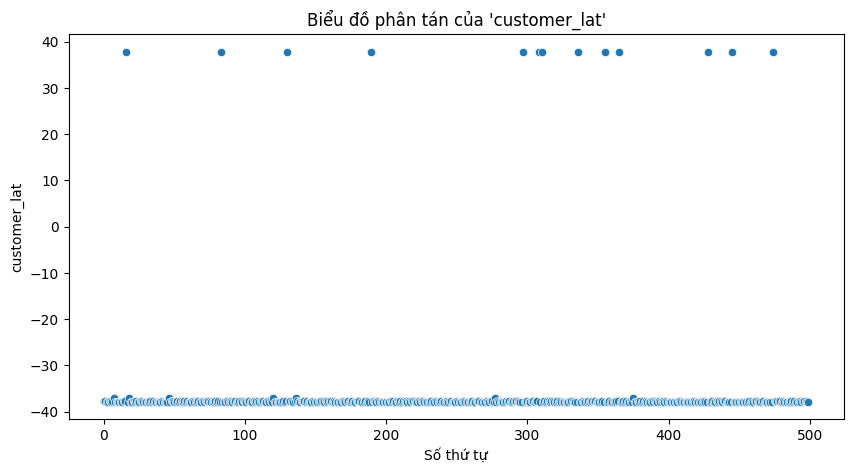

In [15]:
# Biểu đồ phân tán của "customer_lat"
plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(thongke)), y=thongke['customer_lat'])

plt.title("Biểu đồ phân tán của 'customer_lat'")
plt.xlabel("Số thứ tự")
plt.ylabel("customer_lat")
plt.show()

In [16]:
# Lọc các giá trị customer_lat > -37
out_of_range_values = thongke[thongke['customer_lat'] > -37]

# In ra các giá trị bị lỗi
print(out_of_range_values['customer_lat'])

458    37.823507
245    37.823093
282    37.804518
498    37.820071
353    37.810246
309    37.791485
344    37.808119
5      37.820245
297    37.826339
396    37.815897
412    37.807469
4      37.823859
480    37.804082
Name: customer_lat, dtype: float64


In [17]:
# Sau khi đổi dấu:
thongke['customer_lat'] = thongke['customer_lat'].apply(lambda x: -x if x > 0 else x)

# Tạo lại biến này để dữ liệu mới được cập nhật
out_of_range_values = thongke[thongke['customer_lat'] > -37]

# In kết quả sau khi xử lý
print(out_of_range_values['customer_lat'])

Series([], Name: customer_lat, dtype: float64)


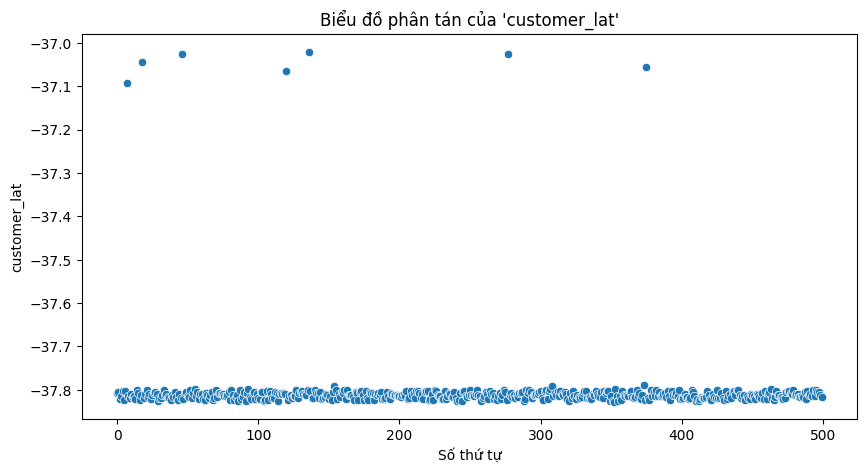

In [18]:
# Biểu đồ phân tán của "customer_lat"
plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(thongke)), y=thongke['customer_lat'])

plt.title("Biểu đồ phân tán của 'customer_lat'")
plt.xlabel("Số thứ tự")
plt.ylabel("customer_lat")
plt.show()

##### <b> •	Xử lý dữ liệu ở cột “customer_long”

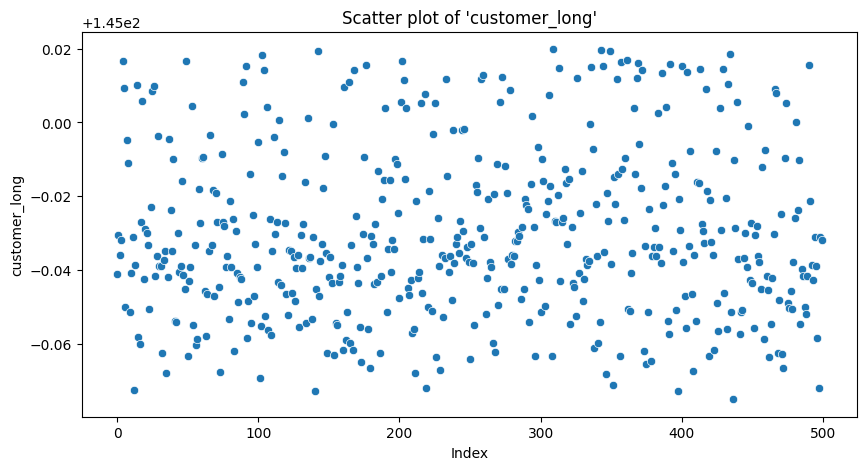

In [19]:
# Biểu đồ phân tán của "customer_lat"
plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(thongke)), y=thongke['customer_long'])

plt.title("Scatter plot of 'customer_long'")
plt.xlabel("Index")
plt.ylabel("customer_long")
plt.show()


##### <b> •	Xử lý dữ liệu ở cột “distance_to_nearest_warehouse”

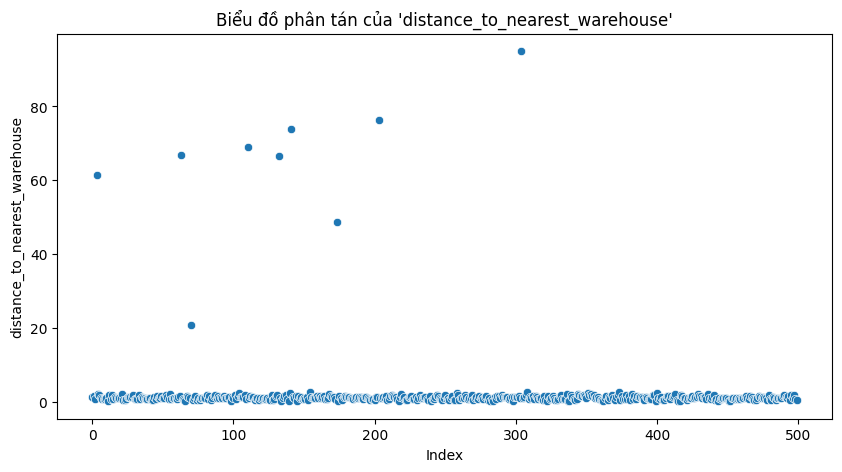

In [20]:
# Biểu đồ phân tán của "distance_to_nearest_warehouse"
plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(thongke)), y=thongke['distance_to_nearest_warehouse'])

plt.title("Biểu đồ phân tán của 'distance_to_nearest_warehouse'")
plt.xlabel("Index")
plt.ylabel("distance_to_nearest_warehouse")
plt.show()

In [21]:
# Tính Q1, Q3 và IQR
Q1 = thongke['distance_to_nearest_warehouse'].quantile(0.25)
Q3 = thongke['distance_to_nearest_warehouse'].quantile(0.75)
IQR = Q3 - Q1

# Ngưỡng dưới và trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc các điểm bất thường
outliers = thongke[(thongke['distance_to_nearest_warehouse'] < lower_bound) | (thongke['distance_to_nearest_warehouse'] > upper_bound)]

# In ra số lượng
print("Số lượng điểm bất thường:", len(outliers))

Số lượng điểm bất thường: 12


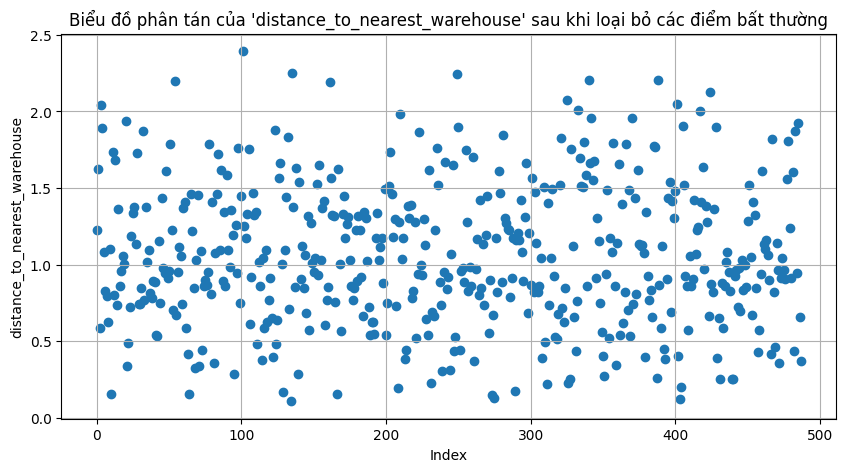

In [22]:
# Tạo bản sao đã loại bỏ outliers
clean_data = thongke[
    (thongke['distance_to_nearest_warehouse'] >= lower_bound) &
    (thongke['distance_to_nearest_warehouse'] <= upper_bound)
].reset_index(drop=True)

# Vẽ biểu đồ scatter plot sau khi lọc các điểm bất thường
plt.figure(figsize=(10, 5))
plt.scatter(x=range(len(clean_data)), y=clean_data['distance_to_nearest_warehouse'])

plt.title("Biểu đồ phân tán của 'distance_to_nearest_warehouse' sau khi loại bỏ các điểm bất thường")
plt.xlabel("Index")
plt.ylabel("distance_to_nearest_warehouse")
plt.grid(True)
plt.show()

##### <b> •	Xử lý dữ liệu ở cột “order_total”

In [23]:
# Tính tổng số tiền và thêm cột 'tong_tien'
thongke['tong_tien'] = thongke['order_price'] * ((100 - thongke['coupon_discount']) / 100) + thongke['delivery_charges']

# Kết quả hiển thị sau khi xử lý
thongke['tong_tien'].head(25)

64      5379.13
205     9582.29
54      2302.95
19      6294.86
26     20346.04
117     2069.47
187    15860.18
87     15448.61
153     7543.51
331    11999.17
341     6655.24
448     6479.02
209    13751.19
127    13757.19
258     3785.32
298    14827.60
458     5931.25
3      21137.61
180     8143.19
299    72366.26
271    14744.86
301    13925.47
141    20388.62
463    14327.27
322     4770.31
Name: tong_tien, dtype: float64

In [24]:
# Tính toán sai lệch
thongke['sai_lech'] = abs(thongke['tong_tien'] - thongke['order_total'])

# Kết quả hiển thị sau khi xử lý
thongke['sai_lech'].head(50)

64           0.00
205          0.00
54           0.00
19           0.00
26           0.00
117          0.00
187          0.00
87           0.00
153          0.00
331          0.00
341          0.00
448          0.00
209          0.00
127          0.00
258          0.00
298          0.00
458          0.00
3            0.00
180          0.00
299      63907.50
271          0.00
301          0.00
141          0.00
463          0.00
322          0.00
51           0.00
305    5677385.57
351      69070.20
202          0.00
410          0.00
377          0.00
259          0.00
415          0.00
356          0.00
380          0.00
404      72510.65
256          0.00
466          0.00
414          0.00
385     907054.67
444          0.00
160          0.00
316          0.00
272          0.00
52           0.00
318          0.00
74           0.00
41      608469.47
156      38565.00
401          0.00
Name: sai_lech, dtype: float64

In [25]:
# Gán cột "tong_tien" vào cột "order_total"
thongke['order_total'] = thongke['tong_tien']

In [26]:
# Kiểm tra độ lệch khác không
so_gia_tri_sai_lech_khac_khong = (thongke['sai_lech'] != 0).sum()

# Kết quả hiển thị
print("Kiểm tra độ lệch khác không:", so_gia_tri_sai_lech_khac_khong)

Kiểm tra độ lệch khác không: 40


##### <b> •	Tổng quan về missing_data.csv

In [27]:
# Kiểm tra và sửa đường dẫn tệp
missing_data_path= r"..\datasets\missing_data.csv"

# Đọc dữ liệu từ tệp CSV
dulieukhuyet = pd.read_csv(missing_data_path)

# Hiển thị 5 số liệu đầu tiên
dulieukhuyet.iloc[0:5]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD382112,ID0289597187,2019-03-06,Thompson,"[('pearTV', 1), ('Candle Inferno', 2)]",7170.0,61.72,-37.811782,144.951972,15,6156.22,Autumn,True,0.4425,"to many adds in ui it has adds, sends info to ...",False
1,ORD378488,ID1668523020,2019-05-05,Thompson,"[('Thunder line', 1), ('Lucent 330S', 2), ('Al...",13590.0,65.20,-37.808236,144.942181,10,12296.20,Autumn,False,0.6547,s10e haven't had this phone but a short time b...,True
2,ORD279446,ID0370751503,2019-03-24,Bakers,"[('Candle Inferno', 2), ('Universe Note', 1)]",4310.0,78.75,-37.812941,144.985883,15,3742.25,NaN,True,0.8852,best bang for your buck! great overall android...,True
3,ORD277196,ID0634774947,2019-01-12,Thompson,"[('pearTV', 1), ('Thunder line', 1), ('Olivia ...",10940.0,92.59,-37.811748,144.938192,25,8297.59,Summer,True,0.7875,good it was a gift for my niece. it to her in ...,True
4,ORD116193,ID3313210924,2019-09-02,Nickolson,"[('pearTV', 2), ('Universe Note', 2), ('Thunde...",21700.0,95.62,-37.818393,144.967034,5,20710.62,Spring,True,0.2225,"excellent product excellent product, was recei...",True


In [28]:
# Tổng quan về file CSV missing_data
print(f'Tổng quan về file CSV missing_data: {dulieukhuyet.shape}')

Tổng quan về file CSV missing_data: (500, 16)


##### <b> •	Xác định dữ liệu bị khuyết

In [29]:
# Thay thế các chuỗi rỗng ("") thành NaN
dulieukhuyet.replace("", np.nan, inplace=True)

# Tính tổng số ô bị thiếu dữ liệu
missing_values = dulieukhuyet.isna().sum().sum()

# In kết quả
print("Số lượng dữ liệu bị khuyết là:", missing_values)


Số lượng dữ liệu bị khuyết là: 80


In [30]:
# Tổng số ô dữ liệu (500 dòng × 16 cột)
total_cells = 500 * 16

# Tính tỷ lệ dữ liệu bị khuyết
missing_rate = missing_values / total_cells

# In kết quả
print("Tỉ lệ dữ liệu bị khuyết là:", missing_rate)

Tỉ lệ dữ liệu bị khuyết là: 0.01


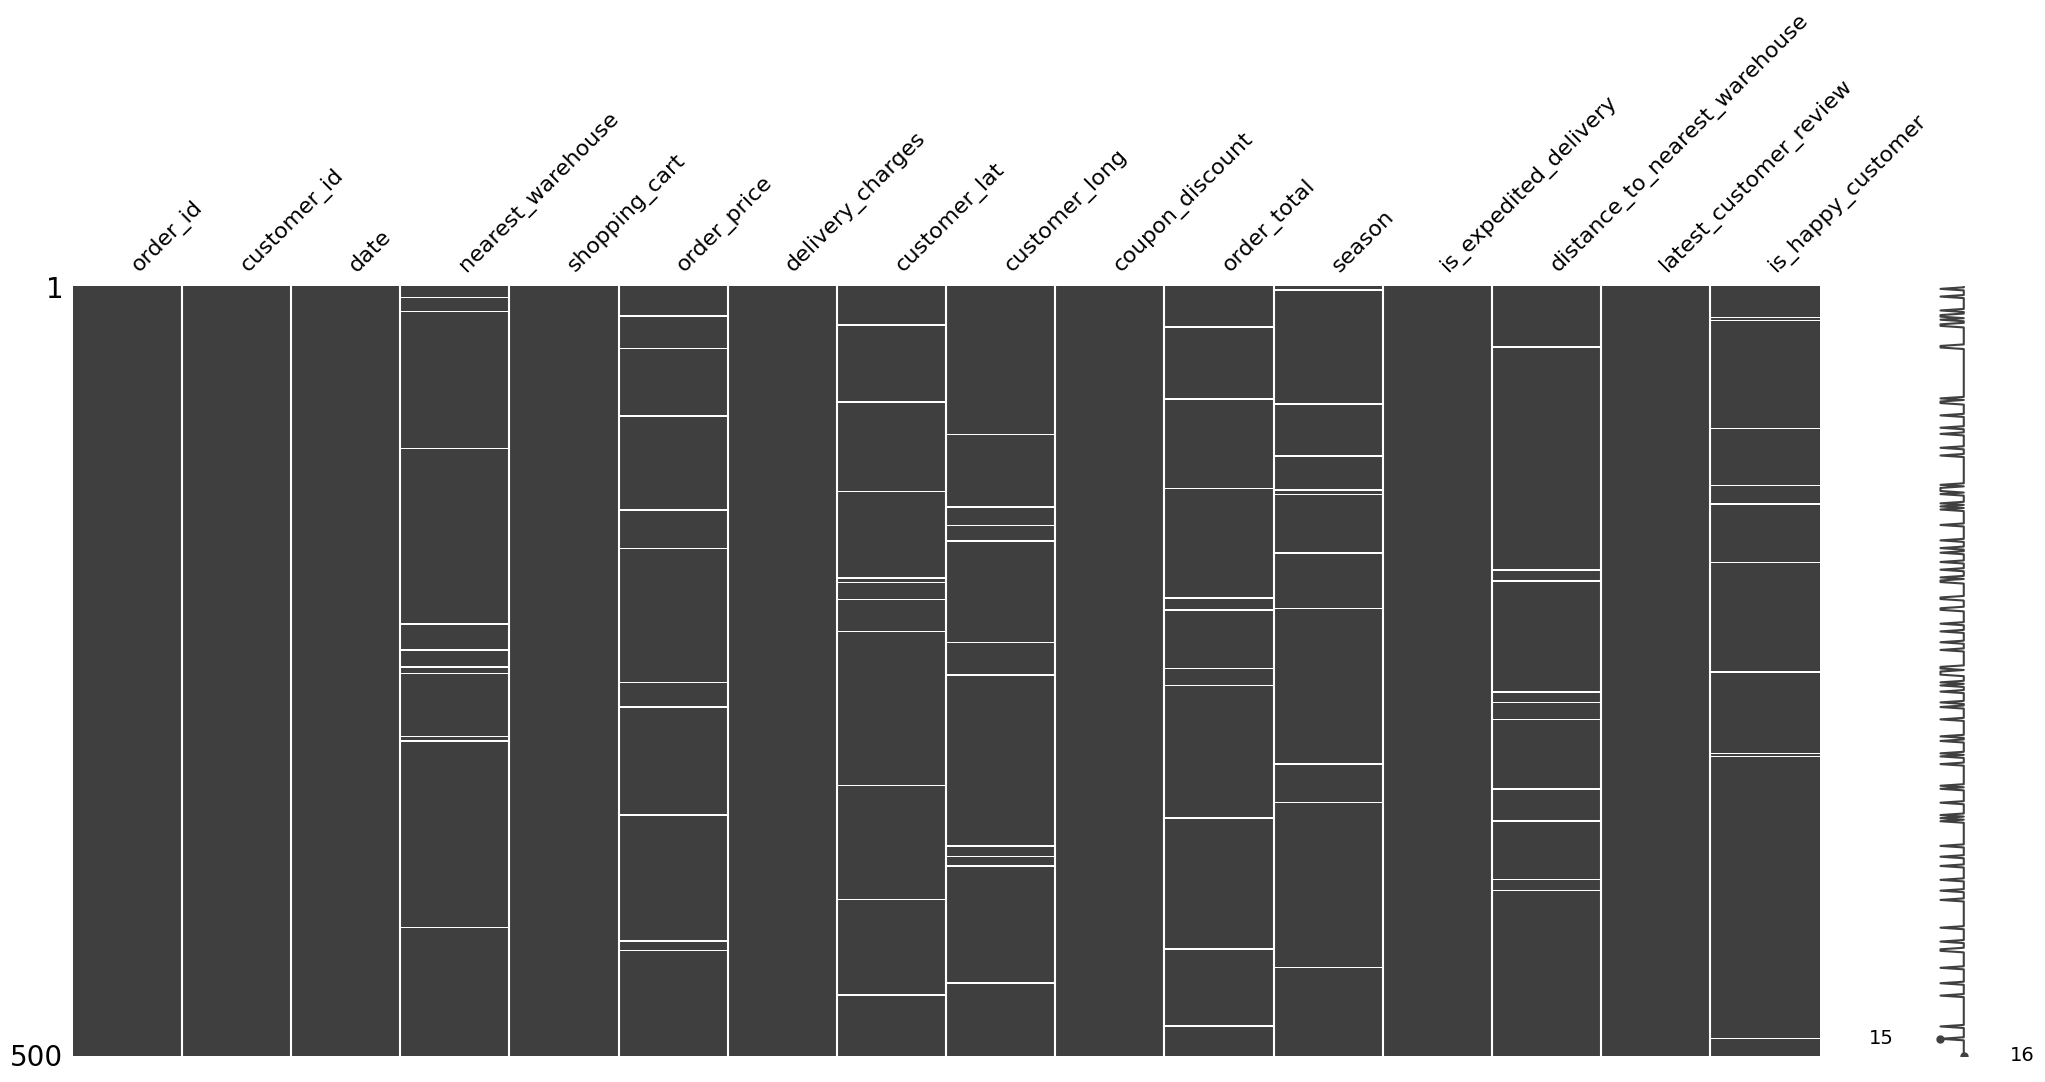

In [31]:
# Trực quan hóa dữ liệu bị thiếu dưới dạng biểu đồ cột
msno.matrix(dulieukhuyet)

# Hiển thị biểu đồ
plt.show()


##### <b> •	Xử lý dữ liệu khuyết ở cột “season”

In [32]:
# Chuyển đổi kiểu dữ liệu của cột 'date'
dulieukhuyet['date'] = pd.to_datetime(dulieukhuyet['date'], errors='coerce')

# Hàm gán mùa theo tháng
def get_season(month):
    if pd.isnull(month):
        return np.nan
    if 1 <= month <= 3:
        return 'Spring'
    elif 4 <= month <= 6:
        return 'Summer'
    elif 7 <= month <= 9:
        return 'Autumn'
    elif 10 <= month <= 12:
        return 'Winter'
    else:
        return np.nan

# Tạo cột 'season' mới dựa trên tháng của ngày
dulieukhuyet['season'] = dulieukhuyet['date'].dt.month.apply(get_season)

# Tính tần suất của từng mùa
season_counts = dulieukhuyet['season'].value_counts()

# Chuyển thành định dạng in ngang
print(season_counts.to_string(index=True, header=False))

Winter    147
Autumn    127
Spring    114
Summer    112


##### <b> •	Xử lý dữ liệu khuyết ở cột “order_total”

In [33]:
# Xác định dòng có order_total bị khuyết
mask = (dulieukhuyet['order_total'].isna() & dulieukhuyet['order_price'].notna() & dulieukhuyet['coupon_discount'].notna() & dulieukhuyet['delivery_charges'].notna())

# Tính lại order_total theo công thức
dulieukhuyet.loc[mask, 'order_total'] = (dulieukhuyet.loc[mask, 'order_price'] * (1 - dulieukhuyet.loc[mask, 'coupon_discount'] / 100) 
                                         + dulieukhuyet.loc[mask, 'delivery_charges']).round(2)

##### <b> •	Xử lý dữ liệu khuyết ở cột “order_price”

In [34]:
# Xác định các dòng có thể tính lại order_price
mask = (
    dulieukhuyet['order_price'].isna() &
    dulieukhuyet['order_total'].notna() &
    dulieukhuyet['coupon_discount'].notna() &
    dulieukhuyet['delivery_charges'].notna()
)

# Tính toán giá trị order_price theo công thức
dulieukhuyet.loc[mask, 'order_price'] = (
    (dulieukhuyet.loc[mask, 'order_total'] - dulieukhuyet.loc[mask, 'delivery_charges']) / (1 - dulieukhuyet.loc[mask, 'coupon_discount'] / 100)).round(2)


##### <b> •	Xử lý dữ liệu khuyết ở cột “customer_lat”, "customer_long" và "distance_to_nearest_warehouse"

In [35]:
# Lấy dữ liệu từ 3 cột cần kiểm tra
data_abc = dulieukhuyet[['customer_lat', 'customer_long', 'distance_to_nearest_warehouse']]

# Kiểm tra mỗi dòng có bao nhiêu giá trị bị thiếu
missing_at_least_two = data_abc.isna().sum(axis=1) >= 2

# Kiểm tra xem có ít nhất 1 dòng thỏa mãn điều kiện
any_missing_at_least_two = missing_at_least_two.any()

# In kết quả
if any_missing_at_least_two:
    print("Có dòng chứa ít nhất 2 giá trị NA.")
else:
    print("Không có dòng nào chứa ít nhất 2 giá trị NA.")

Không có dòng nào chứa ít nhất 2 giá trị NA.


In [36]:
# Duyệt từng dòng trong missing_data
for idx, row in dulieukhuyet.iterrows():
    if pd.isna(row['distance_to_nearest_warehouse']):
        # Tọa độ của khách hàng
        customer_location = (row['customer_lat'], row['customer_long'])

        # Tính khoảng cách đến từng kho
        distances = diachi.apply(lambda wh: geodesic(customer_location, (wh['lat'], wh['lon'])).meters, axis=1)

        # Làm tròn và chuyển sang km
        distances_km = distances / 1000
        distances_km_rounded = distances_km.round(4)

        # Tìm khoảng cách nhỏ nhất và cập nhật
        nearest_index = distances_km_rounded.idxmin()
        dulieukhuyet.at[idx, 'distance_to_nearest_warehouse'] = distances_km_rounded[nearest_index]


In [37]:
# Kiểm tra lại dữ liệu NA
missing_indices = dulieukhuyet[dulieukhuyet['distance_to_nearest_warehouse'].isna()].index
print(missing_indices.tolist())

[]


In [38]:
# Hàm haversine (đơn vị: kilomet)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # bán kính Trái Đất (km)
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Tọa độ 3 kho (lat, lon)
warehouse_A = (-37.81860, 144.9696)
warehouse_B = (-37.81267, 144.9471)
warehouse_C = (-37.81000, 144.9952)

# Duyệt qua từng dòng bị thiếu customer_long
for idx, row in dulieukhuyet.iterrows():
    if pd.isna(row['customer_long']):
        lat = row['customer_lat']

        # Hàm cần tối ưu: tổng khoảng cách đến 3 kho
        def total_distance(lon):
            return min([
                haversine(lat, lon, *warehouse_A),
                haversine(lat, lon, *warehouse_B),
                haversine(lat, lon, *warehouse_C)
            ])

        # Tối ưu để tìm lon phù hợp (trong khoảng -180 đến 180)
        # result = minimize_scalar(total_distance, bounds=(-180, 180), method='bounded')
        
        # Gán kết quả tối ưu
        # dulieukhuyet.at[idx, 'customer_long'] = round(result.x, 4)

In [39]:
# Kiểm tra lại dữ liệu NA
missing_indices = dulieukhuyet[dulieukhuyet['customer_long'].isna()].index
print(missing_indices.tolist())

[96, 143, 155, 165, 231, 252, 363, 370, 376, 452]


##### <b> •	Xử lý dữ liệu cho các điểm bất thường

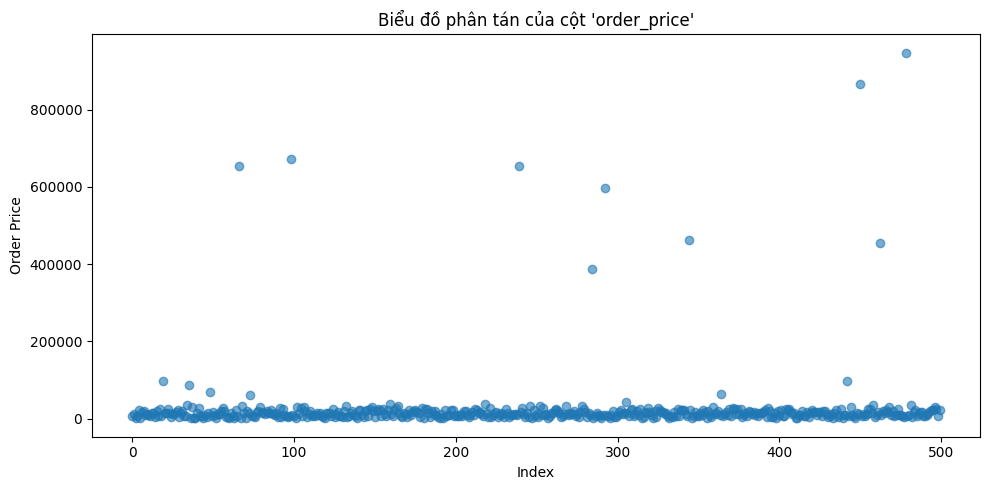

In [40]:
# Vẽ scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(thongke)), thongke['order_price'], alpha=0.6)

# Đặt tiêu đề và nhãn
plt.title("Biểu đồ phân tán của cột 'order_price'")
plt.xlabel("Index")
plt.ylabel("Order Price")

# Hiển thị
plt.tight_layout()
plt.show()

In [41]:
# Tính Q1, Q3
Q1 = thongke['order_price'].quantile(0.25)
Q3 = thongke['order_price'].quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Tính ngưỡng dưới và trên
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Lọc các outlier
outlier_thongke = thongke[(thongke['order_price'] < lower_limit) | (thongke['order_price'] > upper_limit)]

# In số lượng outlier
print("Số lượng điểm bất thường:", len(outlier_thongke))

Số lượng điểm bất thường: 16


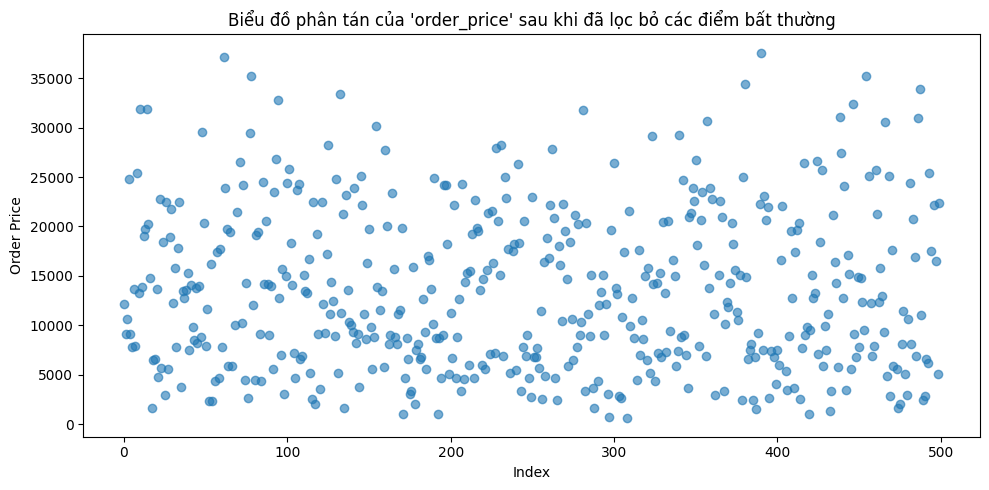

In [42]:
# Tính Q1, Q3, IQR
Q1 = thongke['order_price'].quantile(0.25)
Q3 = thongke['order_price'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng dưới và trên
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Lọc bỏ các outlier => dữ liệu sạch
clean_thongke = thongke[
    (thongke['order_price'] >= lower_limit) & 
    (thongke['order_price'] <= upper_limit)
]

# Vẽ biểu đồ phân tán sau khi loại outlier
plt.figure(figsize=(10, 5))
plt.scatter(clean_thongke.index, clean_thongke['order_price'], alpha=0.6)
plt.title("Biểu đồ phân tán của 'order_price' sau khi đã lọc bỏ các điểm bất thường")
plt.xlabel("Index")
plt.ylabel("Order Price")
plt.tight_layout()
plt.show()

#### <b> 2. THỐNG KÊ MÔ TẢ

##### <b> •	Kiểm tra số lượng và tỉ lệ hài lòng của khách hàng

In [43]:
# Nhóm theo customer_id và đếm số lần xuất hiện
duplicate_customers = (
    dulieukhuyet.groupby('customer_id')
    .size()
    .reset_index(name='n')
)

# Lọc ra những khách hàng có số lần > 1
duplicate_customers = duplicate_customers[duplicate_customers['n'] > 1]

# Kết quả
print("Số khách hàng mua nhiều hơn 1 lần:", len(duplicate_customers))
print(duplicate_customers)


Số khách hàng mua nhiều hơn 1 lần: 5
      customer_id  n
12   ID0052450505  2
74   ID0305909619  2
202  ID0660546021  2
251  ID0844490198  2
302  ID1492175313  2


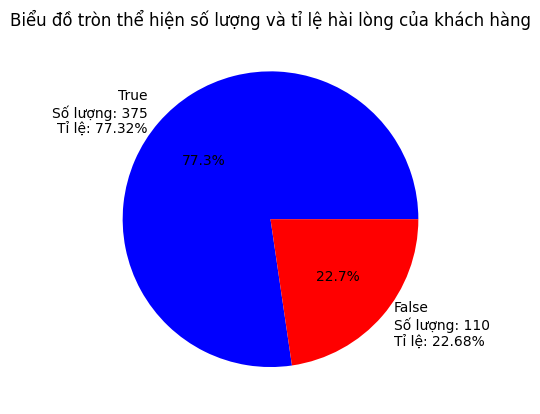

In [44]:
# Loại bỏ bản ghi trùng lặp theo customer_id 
unique_customers = dulieukhuyet.drop_duplicates(subset='customer_id')

# Đếm số lượng theo is_happy_customer
count = unique_customers['is_happy_customer'].value_counts()

# Tạo nhãn cho biểu đồ: có cả số lượng và tỉ lệ phần trăm
labels = [
    f"{label}\nSố lượng: {count[label]}\nTỉ lệ: {round((count[label]/count.sum())*100, 2)}%"
    for label in count.index
]

# Vẽ biểu đồ hình tròn
plt.pie(count, labels=labels, colors=['blue', 'red'], autopct='%1.1f%%')
plt.title('Biểu đồ tròn thể hiện số lượng và tỉ lệ hài lòng của khách hàng')
plt.show()


##### <b> •	Kiểm tra số lượng và tỉ lệ các kho

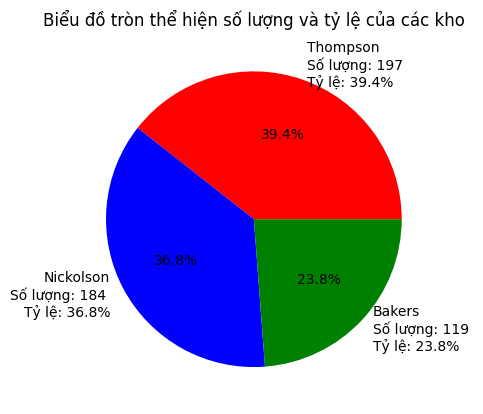

In [45]:
# Tính dữ liệu cho từng kho
count = thongke['nearest_warehouse'].value_counts()

# Tạo nhãn cho biểu đồ hình tròn với phần trăm và số lượng
labels = [f"{name}\nSố lượng: {count} \nTỷ lệ: {round(count/len(thongke)*100, 3)}%" 
          for name, count in zip(count.index, count)]

# Vẽ biểu đồ hình tròn
plt.pie(count, labels=labels, colors=['red', 'blue', 'green'], autopct='%1.1f%%')
plt.title('Biểu đồ tròn thể hiện số lượng và tỷ lệ của các kho')
plt.show()

##### <b> •	Tìm tần suất mua hàng hàng tháng:

In [46]:
# Chuyển đổi cột 'ngày' thành kiểu dữ liệu datetime
thongke['date'] = pd.to_datetime(thongke['date'])

# Tính tần suất mua hàng hàng tháng
purchase_freq_by_month = thongke['date'].dt.month.value_counts().sort_index()

# Kết quả
print(purchase_freq_by_month)

date
1.0     47
2.0     38
3.0     35
4.0     41
5.0     43
6.0     38
7.0     32
8.0     37
9.0     50
10.0    46
11.0    39
12.0    34
Name: count, dtype: int64


##### <b> •	Biểu diễn tần suất mua hàng theo tháng của khách:

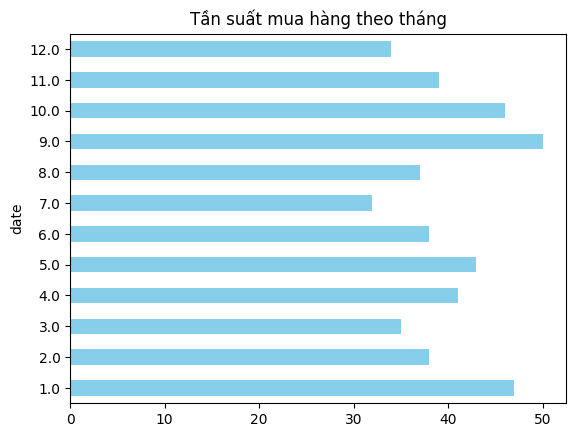

In [47]:
# Chuyển đổi cột 'ngày' thành kiểu dữ liệu datetime nếu chưa chuyển đổi
thongke['date'] = pd.to_datetime(thongke['date'])

# Tính tần suất mua hàng hàng tháng
purchase_freq_by_month = thongke['date'].dt.month.value_counts().sort_index()

# Hiển thị tần số theo chiều ngang
purchase_freq_by_month.plot(kind='barh', color='skyblue')
plt.title('Tần suất mua hàng theo tháng')
plt.show()

In [48]:
# Lấy dữ liệu từ các cột
dulieu_cut = thongke.iloc[:, [3, 5, 6, 7, 8, 9, 10, 12, 13, 15]]

# Kết quả
dulieu_cut.head(20)

,nearest_warehouse,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,is_expedited_delivery,distance_to_nearest_warehouse,is_happy_customer
64,Thompson,5890,78.13,-37.806863,144.958942,10,5379.13,False,1.2283,True
205,Nickolson,12690,64.79,-37.804032,144.969535,25,9582.29,False,1.6211,False
54,Nickolson,2330,89.45,-37.821421,144.963925,5,2302.95,True,0.5863,True
19,Nickolson,6545,77.11,-37.814917,144.968020,5,6294.86,True,61.2935,False
26,Bakers,22490,105.04,-37.802871,145.016633,10,20346.04,True,2.0425,True
117,Bakers,2090,83.97,-37.822806,145.009337,5,2069.47,False,1.8899,True
187,Thompson,16615,75.93,-37.803264,144.950060,5,15860.18,False,1.0799,True
87,Bakers,20520,58.61,-37.091626,144.995224,25,15448.61,False,0.8283,False
153,Bakers,8790,72.01,-37.815071,144.988912,15,7543.51,False,0.7925,True
331,Thompson,13270,56.17,-37.818128,144.948585,10,11999.17,False,0.6217,False


##### <b> •	Vẽ một số biểu đồ:

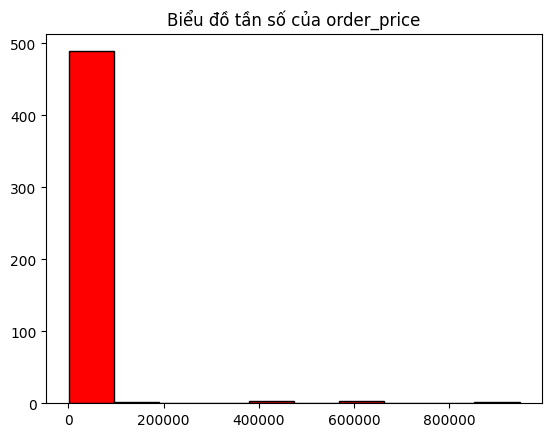

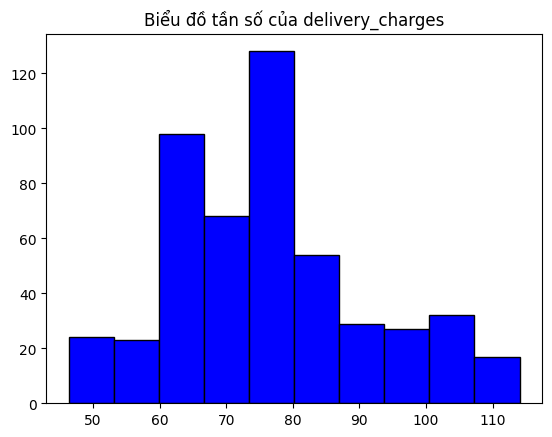

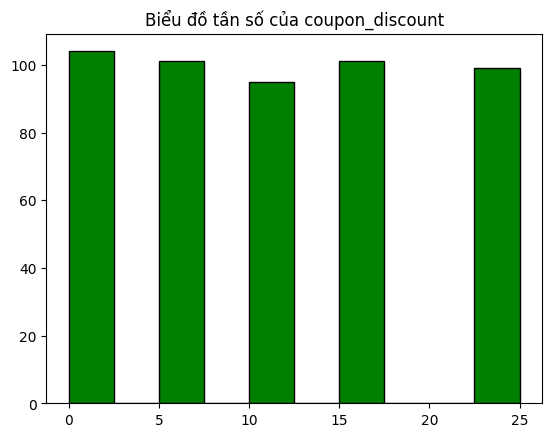

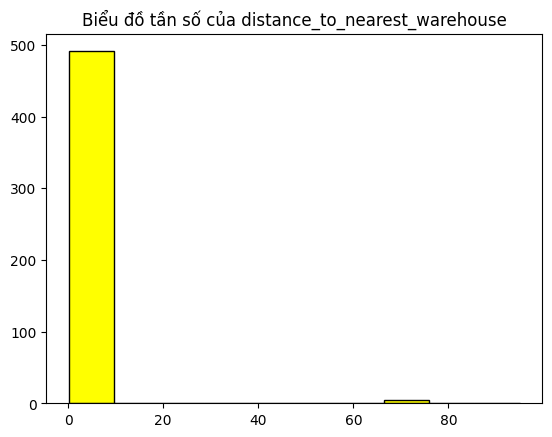

In [49]:
# Vẽ biểu đồ tần suất cho các biến.
plt.hist(dulieu_cut['order_price'], color='red', edgecolor='black')
plt.title('Biểu đồ tần số của order_price')
plt.show()

plt.hist(dulieu_cut['delivery_charges'], color='blue', edgecolor='black')
plt.title('Biểu đồ tần số của delivery_charges')
plt.show()

plt.hist(dulieu_cut['coupon_discount'], color='green', edgecolor='black')
plt.title('Biểu đồ tần số của coupon_discount')
plt.show()

plt.hist(dulieu_cut['distance_to_nearest_warehouse'], color='yellow', edgecolor='black')
plt.title('Biểu đồ tần số của distance_to_nearest_warehouse')
plt.show()

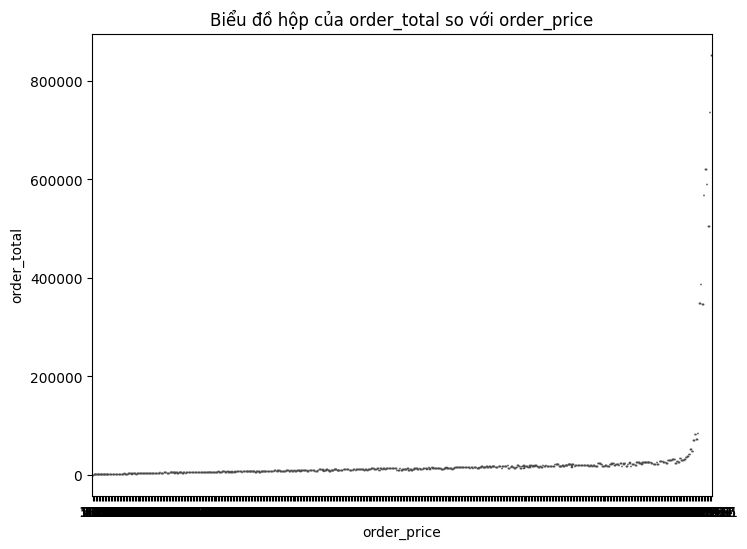

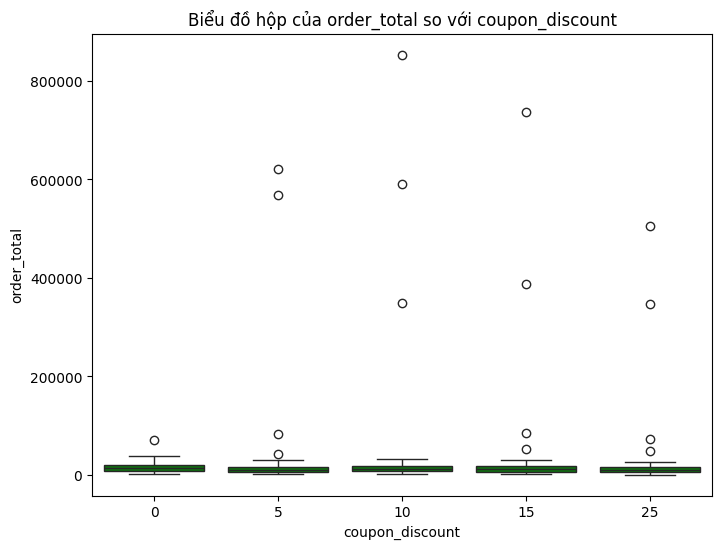

In [50]:
# Tạo biểu đồ hộp cho order_total so với order_price
plt.figure(figsize=(8,6))
sns.boxplot(x='order_price', y='order_total', data=dulieu_cut, color='yellow')
plt.title('Biểu đồ hộp của order_total so với order_price')
plt.show()

# Tạo biểu đồ hộp cho order_total so với coupon_discount
plt.figure(figsize=(8,6))
sns.boxplot(x='coupon_discount', y='order_total', data=dulieu_cut, color='green')
plt.title('Biểu đồ hộp của order_total so với coupon_discount')
plt.show()

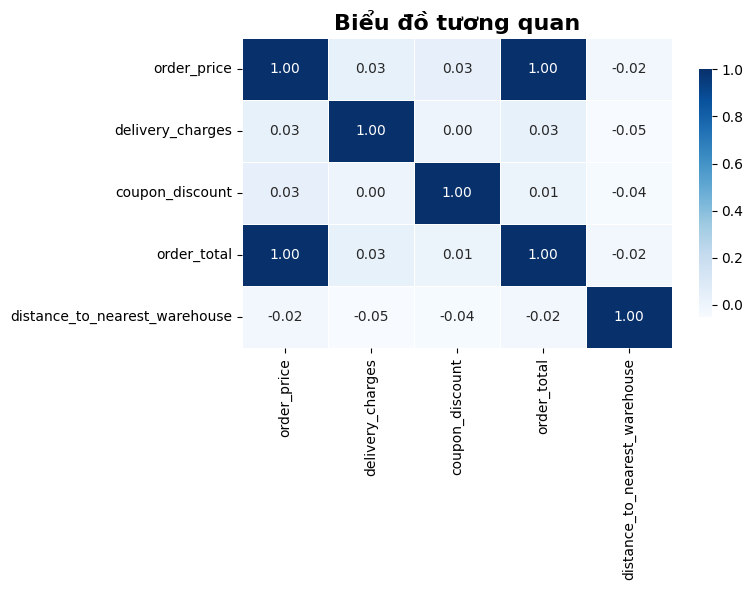

In [51]:
# Tính hệ số tương quan
dulieu_cut1 = thongke.iloc[:, [5, 6, 9, 10, 13]]
correlation_matrix = dulieu_cut1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,               
    cmap='Blues',           
    fmt='.2f',              
    linewidths=0.5,          
    cbar_kws={'shrink': 0.8}  
)

plt.title('Biểu đồ tương quan', fontsize=16, fontweight='bold') 
plt.xticks(rotation=90)   
plt.yticks(rotation=0)  
plt.tight_layout()     
plt.show()

##### <b> •	Thống kê suy diễn

In [52]:
# Hàm thống kê cho biến số
def thongke_mota(x):
    return pd.Series({
        "Min": x.min(),
        "1st Qu.": x.quantile(0.25),
        "Median": x.median(),
        "Mean": x.mean(),
        "3rd Qu.": x.quantile(0.75),
        "Max": x.max(),
        "NA's": x.isna().sum()
    })

# Hàm thống kê cho biến phân loại (object, bool)
def thongke_object(x):
    mode_val = x.mode().iloc[0] if not x.mode().empty else np.nan
    freq_val = x.value_counts().iloc[0] if not x.value_counts().empty else np.nan
    return pd.Series({
        "Most frequent": mode_val,
        "Freq": freq_val,
        "Unique": x.nunique(),
        "NA's": x.isna().sum()
    })

# Cột dạng số
cols_numeric = dulieu_cut.select_dtypes(include=[np.number]).columns
dinhluong = pd.DataFrame({col: thongke_mota(dulieu_cut[col]) for col in cols_numeric})

# Cột dạng phân loại (object, bool)
cols_object = dulieu_cut.select_dtypes(include=['object', 'bool']).columns
dinhchatluong = pd.DataFrame({col: thongke_object(dulieu_cut[col]) for col in cols_object})

In [53]:
# Chuyển đổi 'True' -> 1, 'False' -> 0 
thongke['is_happy_customer'] = thongke['is_happy_customer'].replace({'True': 1, 'False': 0})
thongke['is_expedited_delivery'] = thongke['is_expedited_delivery'].replace({'True': 1, 'False': 0})

In [54]:
# Phương pháp hồi quy tuyến tính
# Biến độc lập
X = thongke[['customer_lat', 'customer_long']]
X = sm.add_constant(X)  

# Biến phụ thuộc
y = thongke['distance_to_nearest_warehouse']

# Xây dựng mô hình
model = sm.OLS(y, X).fit()

# In kết quả thống kê chi tiết
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     distance_to_nearest_warehouse   R-squared:                       0.000
Model:                                       OLS   Adj. R-squared:                 -0.004
Method:                            Least Squares   F-statistic:                   0.01849
Date:                           Mon, 14 Apr 2025   Prob (F-statistic):              0.982
Time:                                   01:16:23   Log-Likelihood:                -1797.0
No. Observations:                            500   AIC:                             3600.
Df Residuals:                                497   BIC:                             3613.
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [55]:
# Xây dựng mô hình ANOVA
model = ols('distance_to_nearest_warehouse ~ delivery_charges', data=thongke).fit()

# Thực hiện phân tích ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# In kết quả
print(anova_result)


                        sum_sq     df        F    PR(>F)
delivery_charges    107.437979    1.0  1.38453  0.239893
Residual          38644.240329  498.0      NaN       NaN


In [56]:
# Đảm bảo biến là dạng categorical
thongke['is_expedited_delivery'] = thongke['is_expedited_delivery'].astype('category')

# Xây dựng mô hình ANOVA
model = smf.ols('distance_to_nearest_warehouse ~ is_expedited_delivery', data=thongke).fit()

# Phân tích phương sai (ANOVA)
anova_result = sm.stats.anova_lm(model, typ=2)

# In kết quả
print(anova_result)

                             sum_sq     df         F    PR(>F)
is_expedited_delivery      8.610178    1.0  0.110674  0.739518
Residual               38743.068130  498.0       NaN       NaN


In [57]:
# Đảm bảo biến nhị phân là số (0/1)
thongke['is_happy_customer'] = thongke['is_happy_customer'].astype(int)

# Hồi quy logistic
model = smf.logit('is_happy_customer ~ order_price + delivery_charges + coupon_discount',
                  data=thongke).fit()

# Kết quả
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.499603
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      is_happy_customer   No. Observations:                  500
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Apr 2025   Pseudo R-squ.:                  0.1601
Time:                        01:16:23   Log-Likelihood:                -249.80
converged:                       True   LL-Null:                       -297.42
Covariance Type:            nonrobust   LLR p-value:                 1.648e-20
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.0242      0.755     -6.657      0.000      -6.503      -3.545
order_price

#### <b> 3. MỘT SỐ VÍ DỤ

##### <b> •	Kiểm định 1 tổng thể

In [58]:
#Số lượng khách hàng
n = 500

# Tỷ lệ giả định theo H0
p0 = 2/3

# Tỷ lệ quan sát được trong mẫu
p_qsm = 359 / 500

# Sai số chuẩn
se = math.sqrt(p0 * (1 - p0) / n)

# Giá trị thống kê thử nghiệm (điểm Z)
z = (p_qsm - p0) / se

# Mức độ quan trọng
alpha = 0.05

# Giá trị quan trọng tương ứng với mức ý nghĩa (z_1)
z_1 = norm.ppf(1 - alpha/2)

# In kết quả
print("Giá trị kiểm định Z:", round(z, 4))
print("Giá trị tới hạn tương ứng với mức ý nghĩa:", round(z_1, 4))

# Kiểm tra điều kiện và đưa ra kết luận
if abs(z) < z_1:
    print("Z không nằm trong miền bác bỏ H0")
    print("Không đủ cơ sở để bác bỏ giả thiết H0!")
else:
    print("Z nằm trong miền bác bỏ H0")
    print("Có đủ cơ sở để bác bỏ giả thiết H0!")


Giá trị kiểm định Z: 2.435
Giá trị tới hạn tương ứng với mức ý nghĩa: 1.96
Z nằm trong miền bác bỏ H0
Có đủ cơ sở để bác bỏ giả thiết H0!


##### <b> •	Kiểm định  tổng thể

In [59]:
# Dữ liệu
n1 = 119
m1 = 80
f1 = m1 / n1

n2 = 197
m2 = 142
f2 = m2 / n2

f = (f1 * n1 + f2 * n2) / (n1 + n2)

# Độ lệch chuẩn
se = (f1 -f2) / math.sqrt(f * (1 - f) * (1/n1 + 1/n2))

# Mức ý nghĩa
alpha = 0.05

# Giá trị quan trọng tương ứng với mức ý nghĩa
z_alpha = norm.ppf(1 - alpha)

# Kết quả
print(f"Giá trị tiêu chuẩn kiểm định: z = {round(se, 4)}")
print(f"Giá trị tương ứng với mức ý nghĩa: {round(z_alpha, 4)}")

# Kiểm tra điều kiện và đưa ra kết luận
if abs(se) < z_alpha:
    print("Không có đủ cơ sở để bác bỏ giả thiết H0!")
    print("Không có sự khác biệt đáng kể giữa tỉ lệ hài lòng của khách hàng ở hai kho!")
else:
    print("Có đủ bằng cơ sở để bác bỏ giả thiết H0!")
    print("Tỷ lệ khách hàng hài lòng ở kho Thompson cao hơn ở kho Bakers!")


Giá trị tiêu chuẩn kiểm định: z = -0.9146
Giá trị tương ứng với mức ý nghĩa: 1.6449
Không có đủ cơ sở để bác bỏ giả thiết H0!
Không có sự khác biệt đáng kể giữa tỉ lệ hài lòng của khách hàng ở hai kho!


##### <b> • Anova

In [60]:
# Làm sạch cột is_expedited_delivery
thongke['is_expedited_delivery'] = thongke['is_expedited_delivery'].astype(str).str.strip().str.upper()

# Bây giờ lọc và thống kê lại
so_luong_van_chuyen_nhanh = thongke[
    thongke['is_expedited_delivery'] == 'TRUE'
].groupby('nearest_warehouse') \
 .size().reset_index(name='so_luong_van_chuyen_nhanh')

print(so_luong_van_chuyen_nhanh)

  nearest_warehouse  so_luong_van_chuyen_nhanh
0            Bakers                         60
1         Nickolson                         97
2          Thompson                         92


In [61]:
# Đảm bảo rằng cột 'date' có kiểu dữ liệu datetime
thongke['date'] = pd.to_datetime(thongke['date'], errors='coerce')

# Thêm cột 'month' chứa tháng mà đơn hàng được đặt
thongke['month'] = thongke['date'].dt.to_period('M')

# Làm sạch cột 'is_expedited_delivery'
thongke['is_expedited_delivery'] = thongke['is_expedited_delivery'].astype(str).str.strip().str.upper()

# Lọc các đơn hàng được giao nhanh (is_expedited_delivery == 'TRUE')
so_luong_van_chuyen_nhanh = thongke[thongke['is_expedited_delivery'] == 'TRUE'] \
    .groupby(['month', 'nearest_warehouse']) \
    .size() \
    .unstack(fill_value=0)  # Dùng unstack để tạo bảng cột cho từng kho

# In kết quả thống kê
print(so_luong_van_chuyen_nhanh)

nearest_warehouse  Bakers  Nickolson  Thompson
month                                         
2019-01                 5          9         6
2019-02                 0          7         9
2019-03                 5          3         6
2019-04                 5          8         7
2019-05                 5         10         7
2019-06                 6          6        12
2019-07                 3          7         5
2019-08                 7         10         6
2019-09                 6         10         6
2019-10                 8          8         9
2019-11                 6          9         8
2019-12                 2          3         6


In [62]:
# Dữ liệu
thompson = np.array([6, 9, 8, 7, 13, 6, 6, 6, 10, 8, 6, 6], dtype=float) 
nickolson = np.array([9, 8, 5, 9, 12, 6, 7, 11, 10, 8, 9, 3], dtype=float)  
bakers = np.array([5, 0, 6, 6, 5, 6, 3, 6, 6, 8, 6, 2], dtype=float)  

# Tạo khung dữ liệu từ dữ liệu
data = pd.DataFrame({
    'Customer': np.repeat(['Thompson', 'Nickolson', 'Bakers'], 12),
    'Month': np.tile(np.arange(1, 13), 3),
    'Requests': np.concatenate([thompson, nickolson, bakers])
})

# Tạo khung dữ liệu với 'Customer' là một yếu tố
data['Customer'] = data['Customer'].astype('category')

# Thực hiện Anova với các yếu tố 'Requests' và 'Customer'
model = ols('Requests ~ Customer', data=data).fit()

# In kết quả
print(model.summary())

# Lấy giá trị p từ ANOVA
p_value = model.f_pvalue
print(f"P-value: {p_value}")

# Kiểm tra giả thuyết dựa trên giá trị p
alpha = 0.05
if p_value < alpha:
    print("Có đủ cơ sở để bác bỏ giả thiết H0!")
    print("Có sự khác biệt đáng kể về yêu cầu giao hàng nhanh giữa ít nhất một cặp khách hàng!")
else:
    print("Không có đủ cơ sở để bác bỏ giả thiết Ho!")
    print("Không có sự khác biệt đáng kể về yêu cầu giao hàng nhanh giữa các khách hàng!")


                            OLS Regression Results                            
Dep. Variable:               Requests   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     6.493
Date:                Mon, 14 Apr 2025   Prob (F-statistic):            0.00419
Time:                        01:16:23   Log-Likelihood:                -79.724
No. Observations:                  36   AIC:                             165.4
Df Residuals:                      33   BIC:                             170.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.91